# Recurrent Neural Network To Predict Stock Price

Using only one attribute of the dataset to make the prediction.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [9]:
dataset = pd.read_csv('petr4_training.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [10]:
dataset.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [11]:
dataset = dataset.dropna()
dataset.shape

(1242, 7)

In [13]:
dataset_train = dataset.iloc[:, 1:2].values
dataset_train

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [14]:
normalizer = MinMaxScaler(feature_range= (0, 1))

dataset_train_normalized = normalizer.fit_transform(dataset_train)
dataset_train_normalized

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [ ]:
x = []
y = []

# using the last 90 prices to predict the next
for i in range(90, 1242):
    x.append(dataset_train_normalized[i-90:i, 0])
    y.append(dataset_train_normalized[i, 0])

x, y = np.array(x), np.array(y)

In [16]:
x.shape, y.shape

((1152, 90), (1152,))

In [18]:
model = Sequential()

model.add(LSTM(units= 100, return_sequences= True, input_shape= (x.shape[1], 1)))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences= True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50))
model.add(Dropout(rate= 0.3))

model.add(Dense(units= 1, activation= 'linear'))

model.summary()

c:\Users\Pedro\Documents\codigos\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss= 'mean_squared_error', metrics= ['mean_absolute_error'])

In [23]:
model.fit(
    x,
    y,
    epochs= 100,
    batch_size= 32
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0035 - mean_absolute_error: 0.0441
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0033 - mean_absolute_error: 0.0436
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0032 - mean_absolute_error: 0.0424
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0033 - mean_absolute_error: 0.0458
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0033 - mean_absolute_error: 0.0428
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0033 - mean_absolute_error: 0.0446
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0032 - mean_absolute_error: 0.0435
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0030 - mean_absolute_error: 0.0409
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0026 - mean_absolute_error: 0.0383
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0028 - mean_absolute_error: 0.0400
Epoch 11/100
36/36 ━━━━━━━━━━

In [22]:
dataset_test = pd.read_csv('petr4_test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [ ]:
y_test = dataset_test.iloc[:, 1:2].values

In [27]:
dataset_completed = pd.concat((dataset['Open'], dataset_test['Open']), axis= 0)
dataset_completed.shape

(1264,)

In [32]:
len(dataset_completed)-len(dataset_test)-90

1152

In [33]:
inputs = dataset_completed[len(dataset_completed)-len(dataset_test)-90:].values
inputs.shape

(112,)

In [34]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(112, 1)

In [35]:
inputs = normalizer.transform(inputs)
inputs

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [45]:
x_test = []
for i in range(90, 112):
    x_test.append(inputs[i-90:i, 0])

x_test = np.array(x_test)
x_test.shape

# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(22, 90)

In [48]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [49]:
predictions = normalizer.inverse_transform(predictions)

In [50]:
predictions

array([[15.76113 ],
       [15.822208],
       [15.909402],
       [16.062994],
       [16.222296],
       [16.34097 ],
       [16.453382],
       [16.53453 ],
       [16.564802],
       [16.582497],
       [16.652014],
       [16.762966],
       [16.97264 ],
       [17.296774],
       [17.622795],
       [17.84368 ],
       [17.95708 ],
       [17.991808],
       [18.142944],
       [18.441154],
       [18.77723 ],
       [19.054352]], dtype=float32)

In [51]:
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

0.7941071091697001

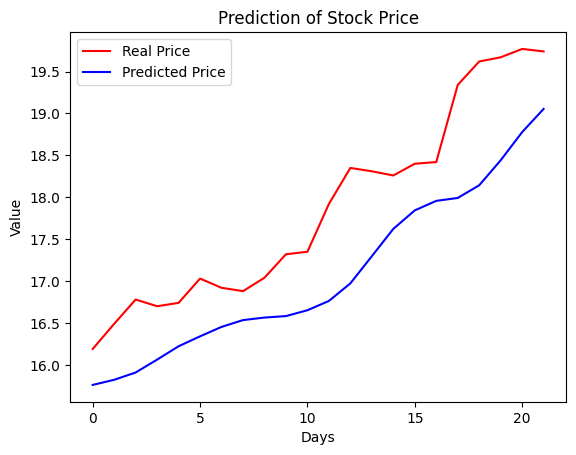

In [54]:
plt.plot(y_test, color= "red", label= "Real Price")
plt.plot(predictions, color= "blue", label= "Predicted Price")
plt.title("Prediction of Stock Price")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()